In [1]:
import json
from rdkit import Chem

In [2]:
path = "../../data_pubchem/common_substructure_pair_dataset.json"

In [3]:
with open(path, 'r') as f:
    data = json.load(f)
common_substructure_pairs = [[key, value] for key, value in data.items()]

In [4]:
num_groups = len(common_substructure_pairs)
smiles_counts = [len(group[1]) for group in common_substructure_pairs]

print(f"Number of different substructures: {num_groups}")
print(f"Total number of SMILES: {sum(smiles_counts)}")
print(f"Average number of SMILES per substructure: {sum(smiles_counts) / num_groups}")

Number of different substructures: 881
Total number of SMILES: 45563
Average number of SMILES per substructure: 51.717366628830874


---------------------------------------------------------------------------
Main SMILES: O=C1c2ccccc2C(=O)c2ccccc21


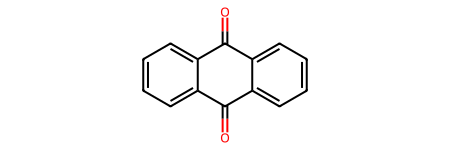

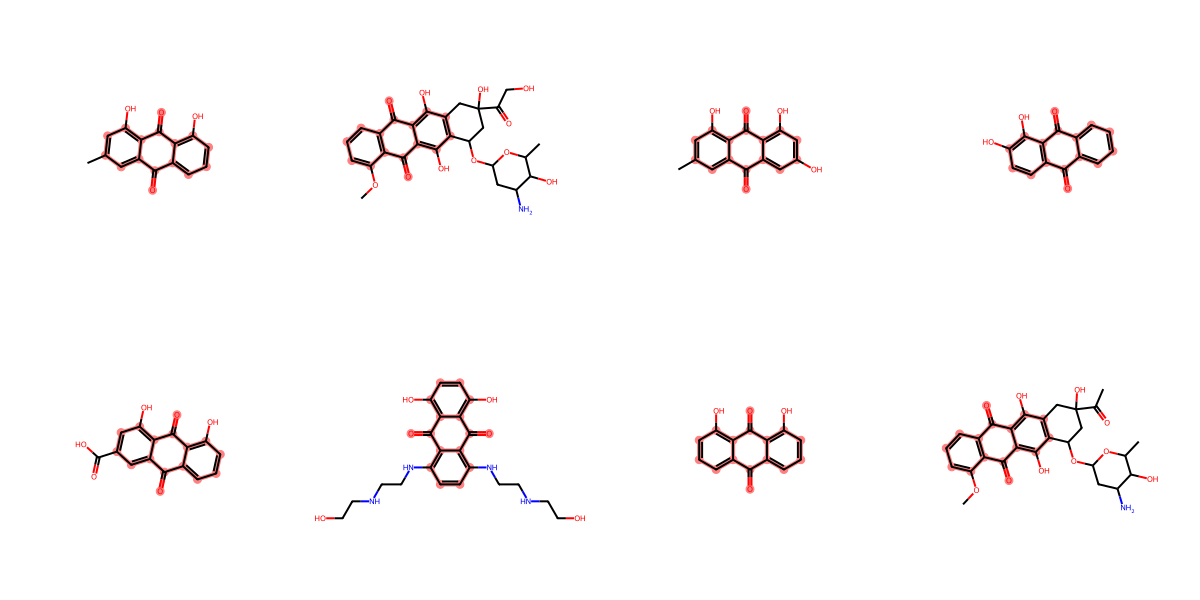

---------------------------------------------------------------------------
Main SMILES: CC1OCCC(O)C1O


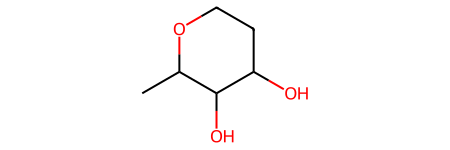

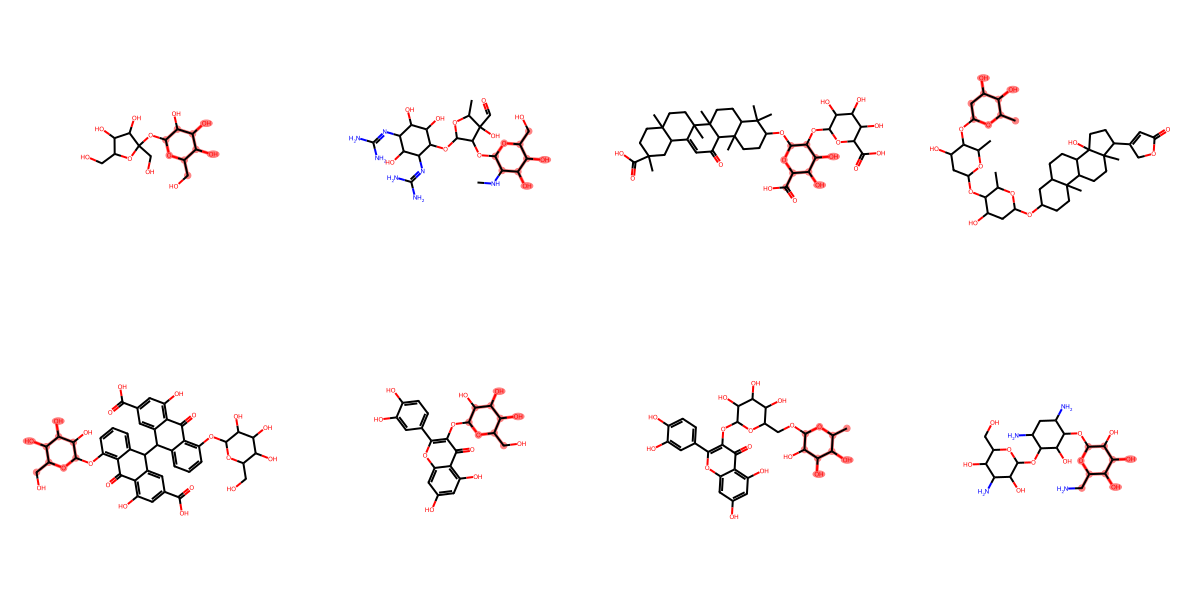

---------------------------------------------------------------------------
Main SMILES: CC12CCCCC1CCC1C2CC(O)C2(C)C(C3=CC(=O)OC3)CCC12O


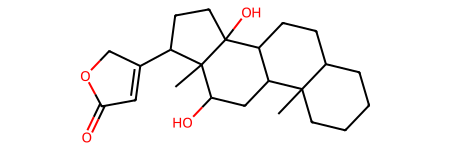

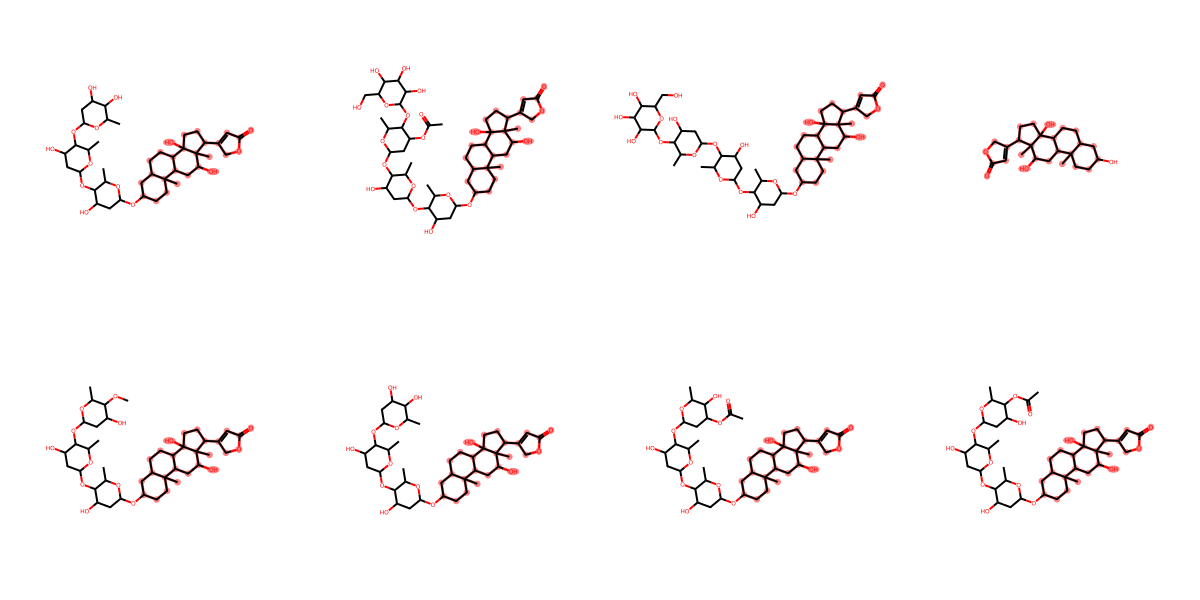

---------------------------------------------------------------------------
Main SMILES: CC1CC(O)CCO1


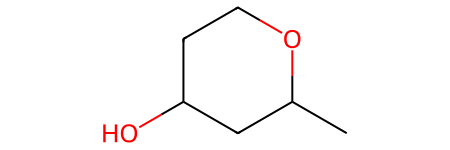

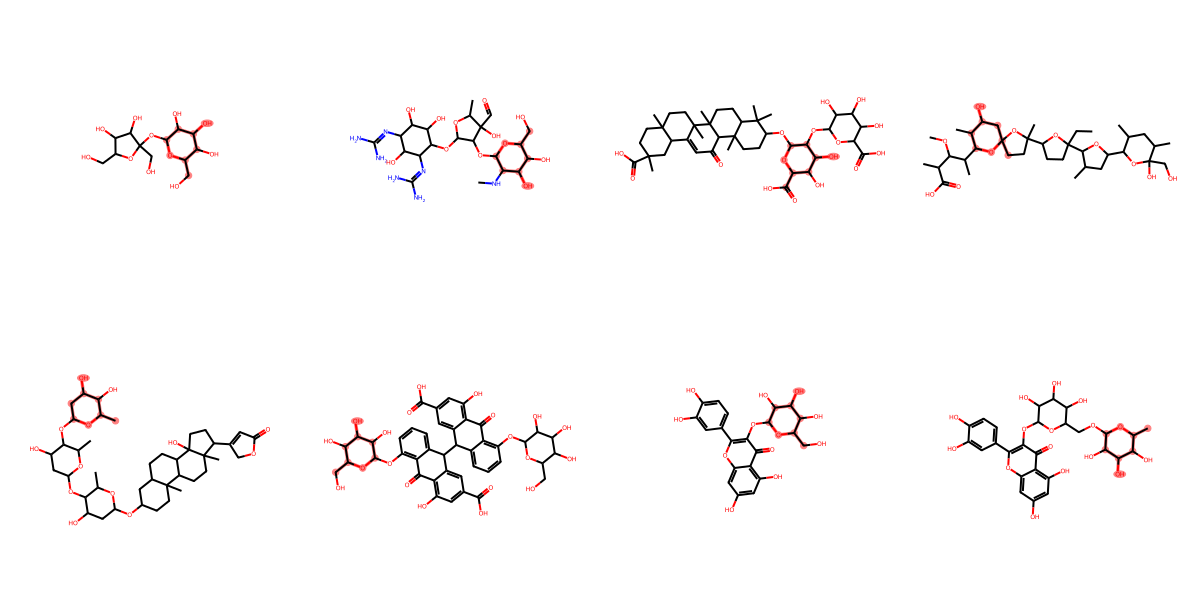

---------------------------------------------------------------------------
Main SMILES: c1ccccc1


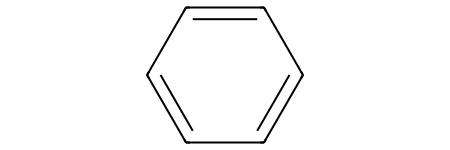

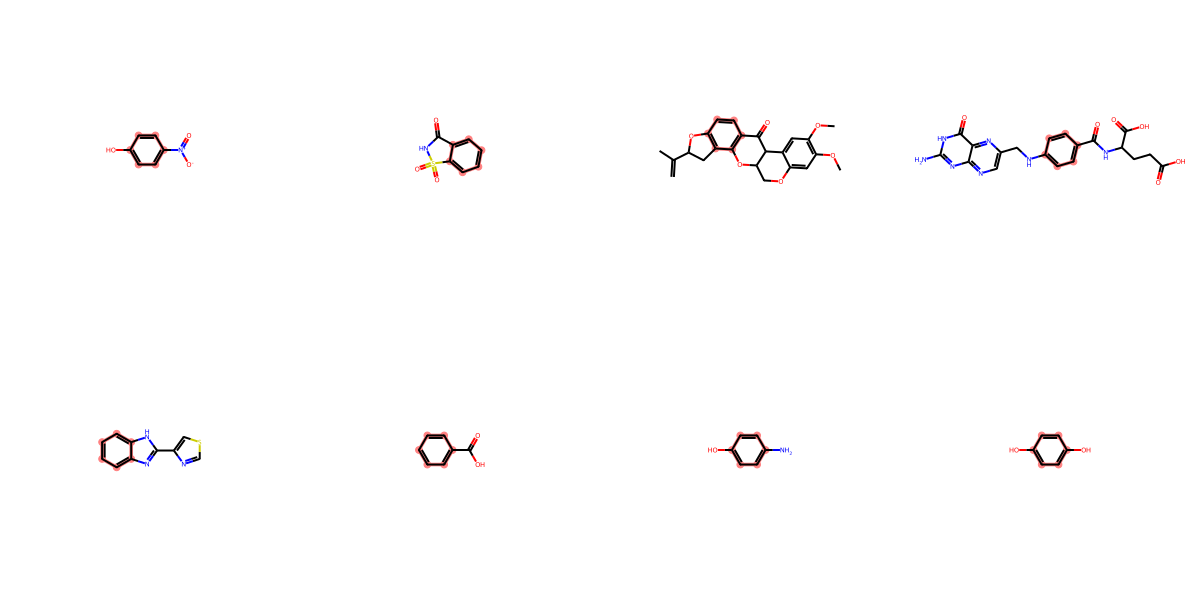

---------------------------------------------------------------------------
Main SMILES: ClC(Cl)=CC(Cl)=C(Cl)Cl


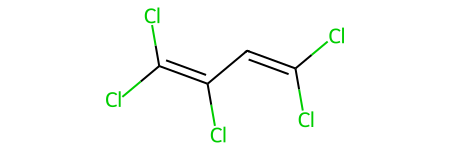

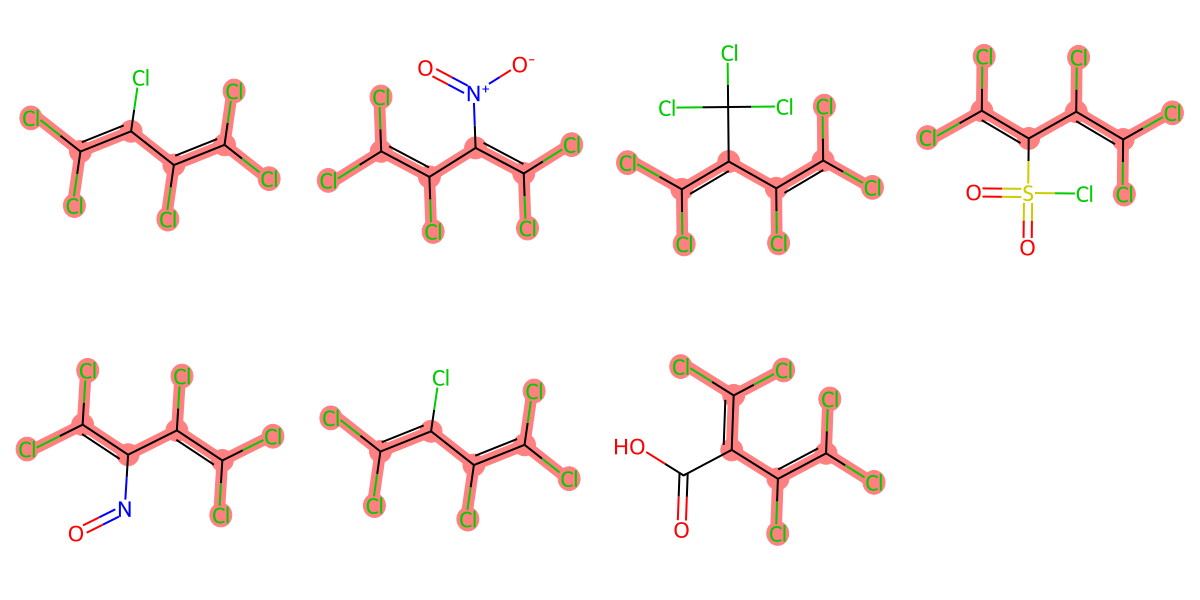

---------------------------------------------------------------------------
Main SMILES: COP(=O)(OC)OC


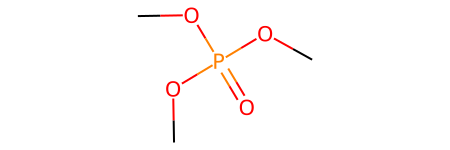

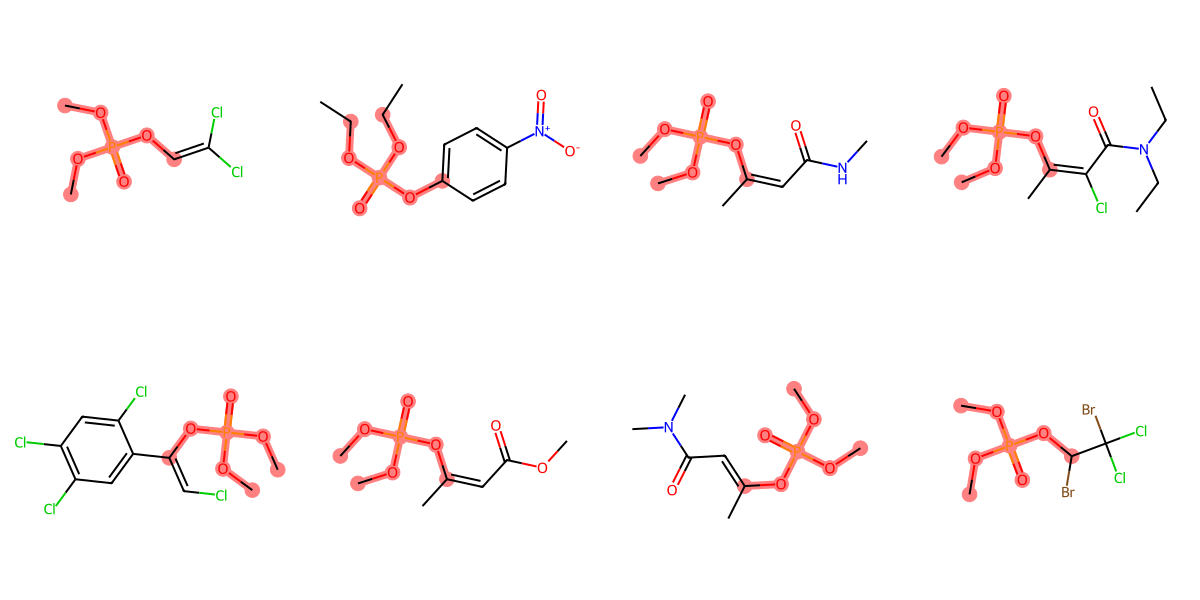

---------------------------------------------------------------------------
Main SMILES: Oc1ccccc1


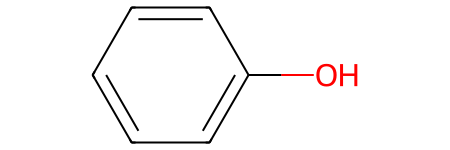

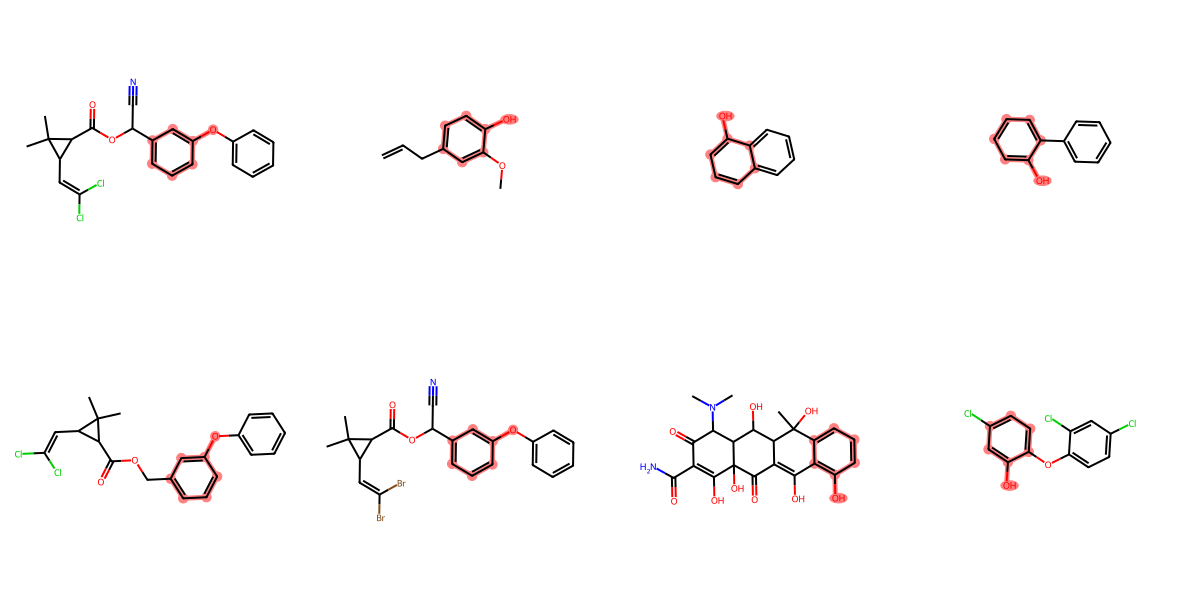

---------------------------------------------------------------------------
Main SMILES: CCC(C)C=O


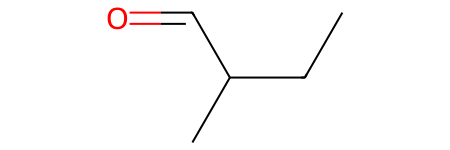

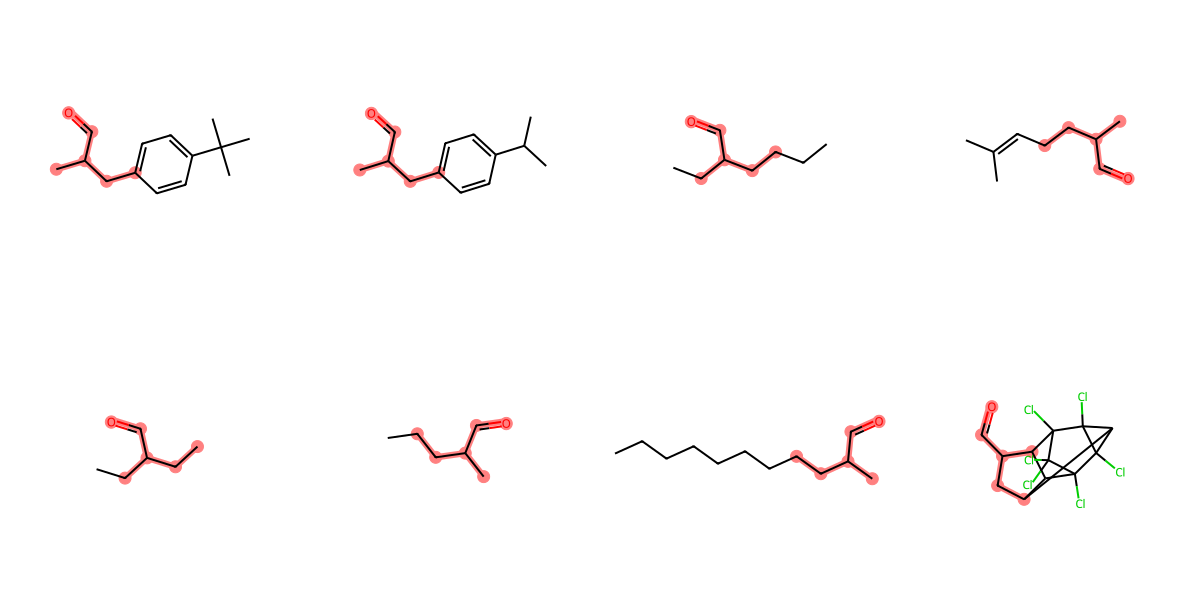

---------------------------------------------------------------------------
Main SMILES: C1COCCN1


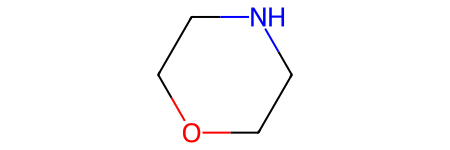

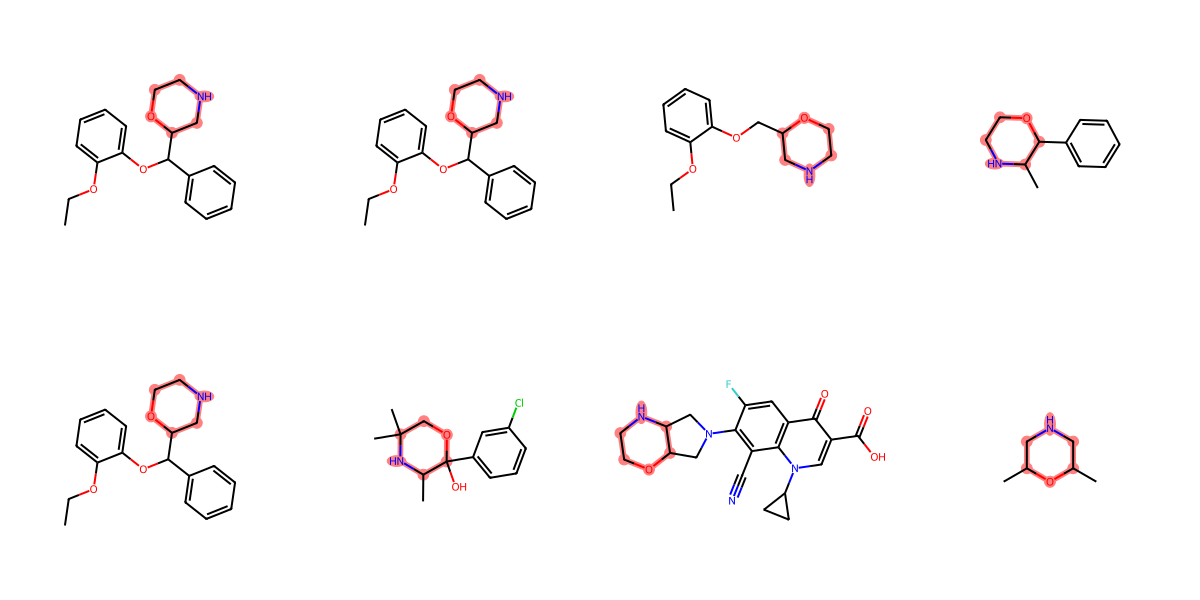

In [5]:
for smiles_group in common_substructure_pairs[:10]:
    print("---------------------------------------------------------------------------")
    highlight_smiles = smiles_group[0]  
    highlight_mol = Chem.MolFromSmiles(highlight_smiles)
    highlight_atoms_list = []  
    mols = []  
    for smile in smiles_group[1]:  
        mol = Chem.MolFromSmiles(smile)
        if mol:
            highlight_atoms = mol.GetSubstructMatch(Chem.MolFromSmiles(highlight_smiles))
            mols.append(mol)
            highlight_atoms_list.append(highlight_atoms)
    if mols:
        print("Main SMILES:", highlight_smiles)
        display(Chem.MolFromSmiles(highlight_smiles))
        img = Chem.Draw.MolsToGridImage(mols[:8], molsPerRow=4, subImgSize=(300, 300), highlightAtomLists=highlight_atoms_list)
        display(img)